## Week 12 - Final Project

## Thavu Mudaliar Kanagaraj, Mathan Kumar

## DSC 530 Data Exploration and Analysis

## Professor: Matthew Metzger

In [4]:
from os.path import basename, exists

#download the thinkstat library files.    
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

### Load Libraries and read CSV File

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import thinkstats2
import thinkplot

# Read the csv file
df = pd.read_csv('/Users/mathan/JupyterNotebooks/Week 12/Apartments_India_Metro_Cities.CSV')


## Identifying Variables and Preparing Data

In [7]:
# Identify variables that are required for Data Exploration Analysis
variables = ['bedrooms', 'bathrooms', 'area', 'parking', 'floor_number', 'gate_community', 'powerbackup', 'furnishing', 'rent']
df = df[variables]
df['rent']=df['rent'].round(0)

# Converting Categorical Variable into Numeric Format
with pd.option_context("future.no_silent_downcasting", True):
    df['gate_community'] = df['gate_community'].replace({'Yes': 1, 'No': 0})


# Validating the values of Variables
df.isnull().sum()

bedrooms          0
bathrooms         0
area              0
parking           0
floor_number      0
gate_community    0
powerbackup       0
furnishing        0
rent              0
dtype: int64

## Variables Definition

1. Area - Total Sq.ft of Living Area in the rental home
2. Bathrooms - Number of bathrooms in the rental home
3. Bedrooms - Number of bedrooms in the rental home
4. Parking - Number of Parking Spaces Available for the rental home
5. Floor Number - The floor on which the rental home is located
6. Gate Community - Indicates whether the rental home is located inside a gated community
7. Power Backup - Availability of Power backup for the rental home(used in case of power failure)
8. Furnishing - Indicates whether the rental home is fully furnished, semi-furnished or not furnished
9. Rent - Rent of the rental home

## Histograms 

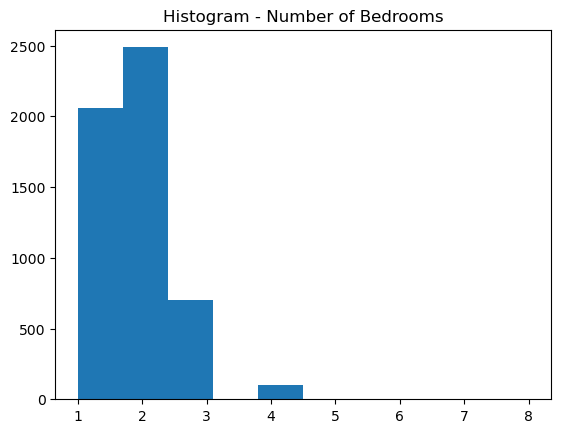

In [10]:
# Plotting Histograms for selected variables

plt.hist(df.bedrooms)
plt.title("Histogram - Number of Bedrooms")
plt.show()


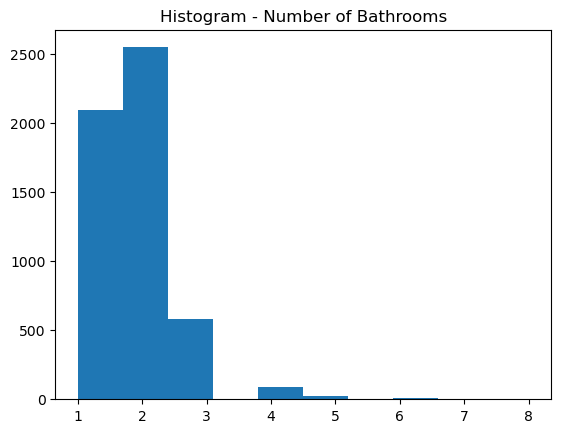

In [12]:
# Plotting Histograms for selected variables

plt.hist(df.bathrooms)
plt.title("Histogram - Number of Bathrooms")
plt.show()

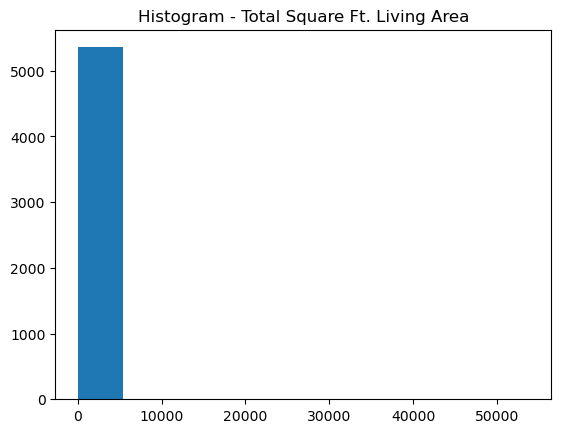

In [140]:
plt.hist(df.area)
plt.title("Histogram - Total Square Ft. Living Area")
plt.show()

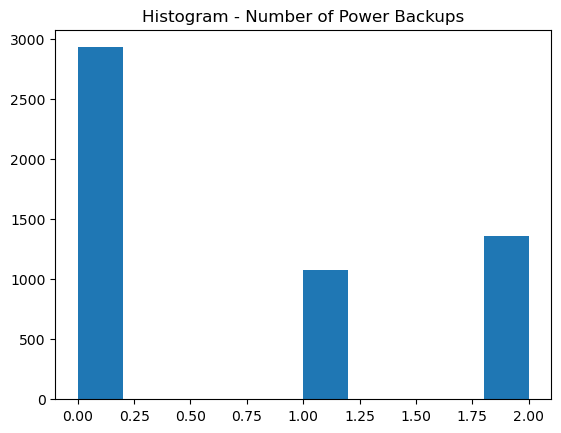

In [16]:
plt.hist(df.powerbackup)
plt.title("Histogram - Number of Power Backups")
plt.show()

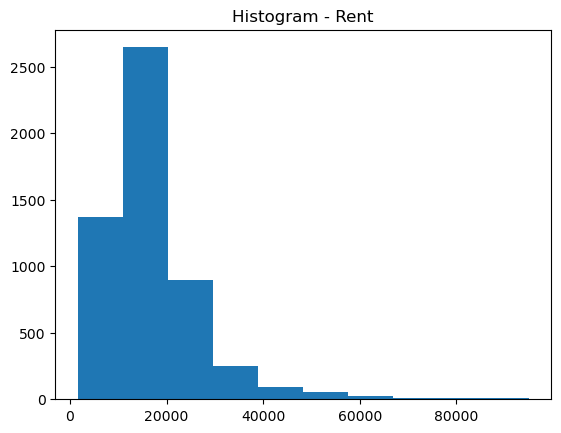

In [18]:
plt.hist(df.rent)
plt.title("Histogram - Rent")
plt.show()

## Outliers

In [137]:
# Define a function to identify outliers(if any)
def identify_outliers(var):
    print(f"Outlier Statistics for Variable: {var}")
    print(f"Outliers (Above 3rd Quartile + 1.5*IQR): {df[var][df[var] > df[var].quantile(0.75) + 1.5 * (df[var].quantile(0.75) - df[var].quantile(0.25))].count()}")
    print(f"Outliers (Below 1st Quartile - 1.5*IQR): {df[var][df[var] < df[var].quantile(0.25) - 1.5 * (df[var].quantile(0.75) - df[var].quantile(0.25))].count()}")
    print()
    
# Identify if there exist outliers on each variable
identify_outliers("bedrooms")
identify_outliers("bathrooms")
identify_outliers("area")
identify_outliers("powerbackup")
identify_outliers("rent")

Outlier Statistics for Variable: bedrooms
Outliers (Above 3rd Quartile + 1.5*IQR): 112
Outliers (Below 1st Quartile - 1.5*IQR): 0

Outlier Statistics for Variable: bathrooms
Outliers (Above 3rd Quartile + 1.5*IQR): 132
Outliers (Below 1st Quartile - 1.5*IQR): 0

Outlier Statistics for Variable: area
Outliers (Above 3rd Quartile + 1.5*IQR): 63
Outliers (Below 1st Quartile - 1.5*IQR): 0

Outlier Statistics for Variable: powerbackup
Outliers (Above 3rd Quartile + 1.5*IQR): 0
Outliers (Below 1st Quartile - 1.5*IQR): 0

Outlier Statistics for Variable: rent
Outliers (Above 3rd Quartile + 1.5*IQR): 219
Outliers (Below 1st Quartile - 1.5*IQR): 0



#### Observation:

Based on the analysis, outliers represent natural variations in the population, and therefore not removing the outliers from the dataset since these are true outliers. For example: The data points dispalyed above the 3rd quartile when computed using Rent variable are related to bigger properties that have higher rent.

## Descriptive Characteristics

In [22]:
# Define a function to calculate descriptive statistics
def describe_variable(var):
    print(f"Descriptive Statistics for Variable: {var}")
    print(f"Mean: {df[var].mean():.2f}")
    print(f"Mode: {df[var].mode().values[0]}")
    print(f"Spread: {df[var].max() - df[var].min()}")
    print(f"Skewness/Tail: {df[var].skew():.2f}")
    print()

    
# Calculate descriptive statistics for each variable

describe_variable("bedrooms")
describe_variable("bathrooms")
describe_variable("area")
describe_variable("powerbackup")
describe_variable("rent")

Descriptive Statistics for Variable: bedrooms
Mean: 1.79
Mode: 2
Spread: 7
Skewness/Tail: 0.83

Descriptive Statistics for Variable: bathrooms
Mean: 1.78
Mode: 2
Spread: 7
Skewness/Tail: 1.25

Descriptive Statistics for Variable: area
Mean: 547.47
Mode: 0.0
Spread: 53766.0
Skewness/Tail: 32.06

Descriptive Statistics for Variable: powerbackup
Mean: 0.71
Mode: 0
Spread: 2
Skewness/Tail: 0.60

Descriptive Statistics for Variable: rent
Mean: 17072.73
Mode: 15000.0
Spread: 93400.0
Skewness/Tail: 2.44



## Compare using PMF

In [26]:
# Probability Mass Function (PMF) compare 

# Dataframe to hold details about Rent of Homes with Power Backup
powerbackup_df = df[df['powerbackup'] != 0]

# Dataframe to hold details about Rent of Homes with No Power Backup
no_powerbackup_df = df[df['powerbackup'] == 0]


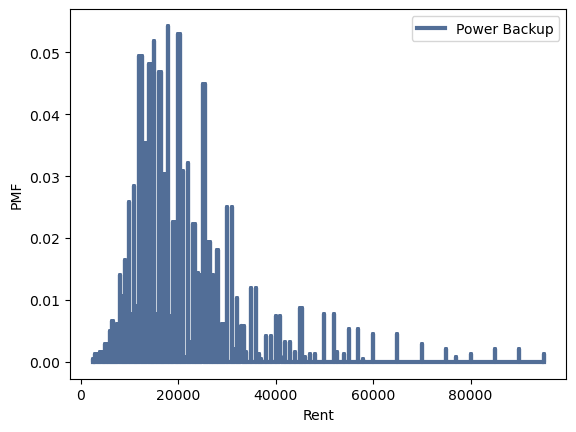

<Figure size 800x600 with 0 Axes>

In [28]:
# Plotting PMF of Rent of Homes with power backup
powerbackup_pmf = thinkstats2.Pmf(powerbackup_df.rent, label="Power Backup")
thinkplot.Pmf(powerbackup_pmf)
thinkplot.Show(xlabel='Rent', ylabel='PMF')

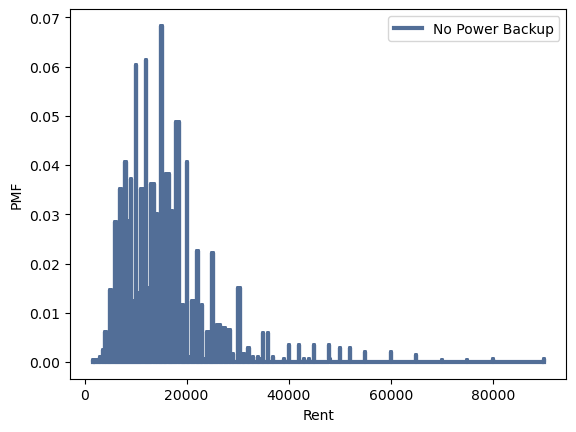

<Figure size 800x600 with 0 Axes>

In [30]:
# Plotting PMF of Rent of Homes with no power backup
no_powerbackup_pmf = thinkstats2.Pmf(no_powerbackup_df.rent, label="No Power Backup")
thinkplot.Pmf(no_powerbackup_pmf)
thinkplot.Show(xlabel='Rent', ylabel='PMF')

#### Observation:

Based on the analysis, Homes with power backups have higher rent when compared to Homes without power backup.

## CDF

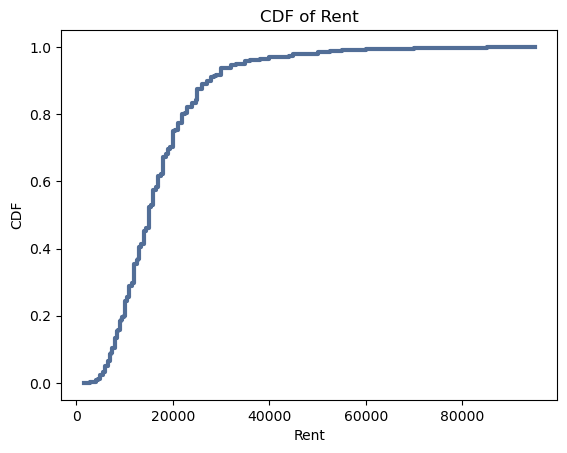

<Figure size 800x600 with 0 Axes>

In [32]:
# Plotting CDF

rent_cdf = thinkstats2.Cdf(df.rent)
thinkplot.Cdf(rent_cdf)
thinkplot.Show(xlabel='Rent', ylabel='CDF', title='CDF of Rent')

#### Observation:

Based on the analysis, roughly 80% of the rental homes have rent less than 20,000 Indian Rupees (240 USD). This tells us that major target for the rental properties are middle class and lower income population who cannot afford bigger homes.

## Analytical Distribution

In [34]:
# Analytical Distribution

mu, var = thinkstats2.TrimmedMeanVar(df.rent)
sigma = np.sqrt(var)
print('Mean :', mu)
print('Var  :',var)
print('Sigma:',sigma)

Mean : 16668.90256898192
Var  : 70879034.86129689
Sigma: 8418.968752840035


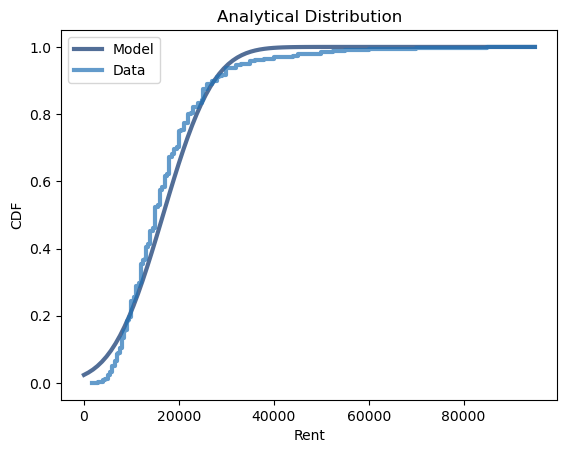

<Figure size 800x600 with 0 Axes>

In [36]:
# Analytical Distribution (Normal Distribution)

# Plot the model
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=95000)
thinkplot.Plot(xs, ps, label='Model')

# Plot the data
rent_cdf = thinkstats2.Cdf(df.rent, label='Data')
thinkplot.Cdf(rent_cdf) 

thinkplot.Show(xlabel='Rent', ylabel='CDF', title='Analytical Distribution')

#### Observation:

Based on the analysis, it is evident that the model is very closely aligned to actual data.

## Scatter Plot

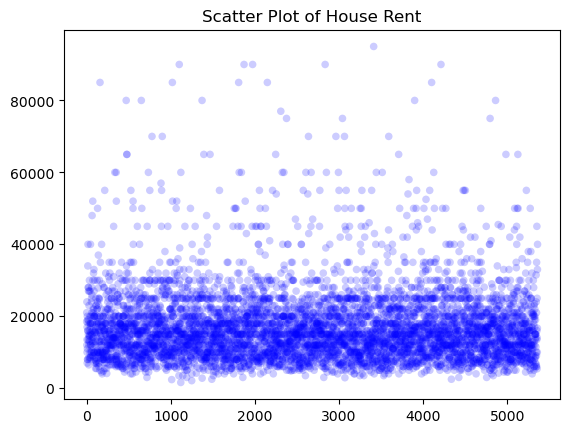

<Figure size 800x600 with 0 Axes>

In [79]:
# Create Scatter Plot for Rent
thinkplot.Scatter(df.rent)
thinkplot.Config(title="Scatter Plot of House Rent")
thinkplot.show()

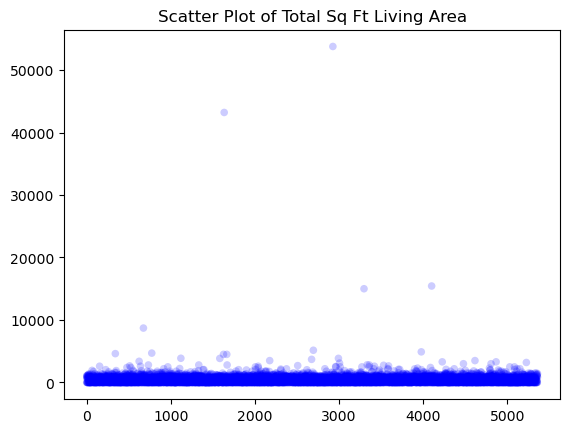

<Figure size 800x600 with 0 Axes>

In [64]:
# Create Scatter Plot for Total Sq Ft Living Area
thinkplot.Scatter(df.area)
thinkplot.Config(title="Scatter Plot of Total Sq Ft Living Area")
thinkplot.show()

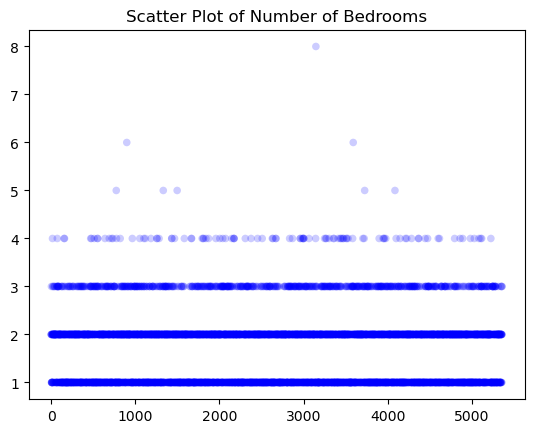

<Figure size 800x600 with 0 Axes>

In [66]:
# Create Scatter Plot for Number of Bedrooms
thinkplot.Scatter(df.bedrooms)
thinkplot.Config(title="Scatter Plot of Number of Bedrooms")
thinkplot.show()

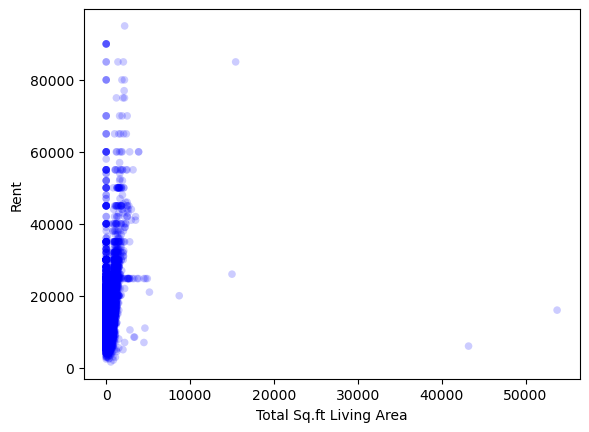

Pearson Correlation  :0.17014944935868143
Spearman Correlation :0.33000909259535205


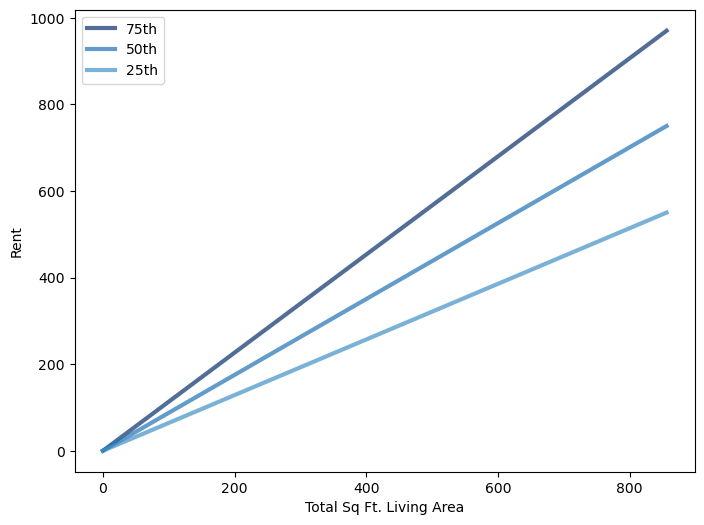

In [85]:
# Create Scatter Plot for Total Sq Ft of Living Area vs Rent
thinkplot.Scatter(df.area,df.rent)
thinkplot.Config(xlabel="Total Sq.ft Living Area", ylabel="Rent")
thinkplot.show()

# Percentile Plot for Rent vs Total Sq Ft Living Area
bins = np.arange(1, 6, 1)
indices = np.digitize(df.area, bins)
groups = df.groupby(indices)
area = [group.area.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.area) for i, group in groups]
for percent in [75, 50, 25]:
    rent = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent 
    thinkplot.Plot(area, rent, label=label)
    thinkplot.Config(xlabel="Total Sq Ft. Living Area", ylabel="Rent")
    
print("Pearson Correlation  :"+str(thinkstats2.Corr(df.area, df.rent)))
print("Spearman Correlation :"+str(thinkstats2.SpearmanCorr(df.area, df.rent)))

In [94]:
correlation_coefficient = df.area.corr(df.rent)
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.17014944935868137


### Observation

**Scatter plots**  It is clear that the variables "Rent" and "Total Sq Ft Living Area" have positive relationship. 

**Spearman correlation vs Pearson correlation** Spearman correlation has higher value compared to Pearson correlation indicating that variables are less sensitive to outliers and potentially have a stronger association even if the relationship is not perfectly linear.


**Percentile plot** It is clear that there is a strong positive relationship between Rent and Total Sq.Ft Living Area variables.

**Correlation** The correlation coefficient of Total Sq Ft Living Area vs Rent is 0.17, which indicates a positive correlation but not a strong one.

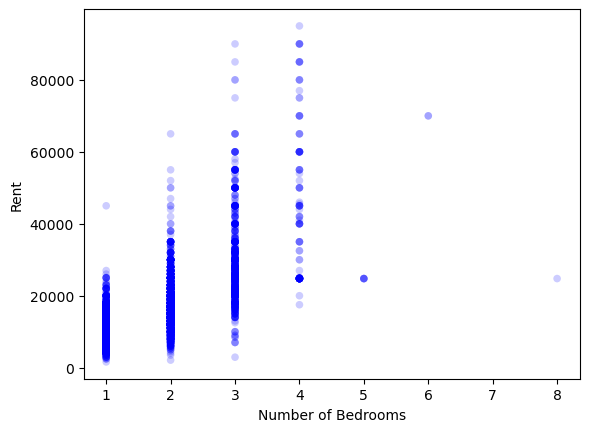

Pearson Correlation  :0.6900448512891213
Spearman Correlation :0.7099567599128861


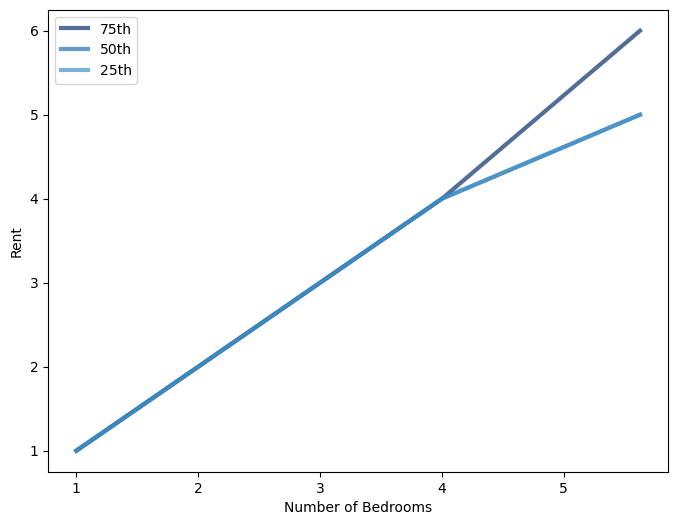

In [83]:
# Create Scatter Plot for Number of Bedrooms vs Rent
thinkplot.Scatter(df.bedrooms,df.rent)
thinkplot.Config(xlabel="Number of Bedrooms", ylabel="Rent")
thinkplot.show()


# Percentile Plot for Rent vs Number of Bedrooms
bins = np.arange(1, 6, 1)
indices = np.digitize(df.bedrooms, bins)
groups = df.groupby(indices)
bedrooms = [group.bedrooms.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.bedrooms) for i, group in groups]
for percent in [75, 50, 25]:
    rent = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent 
    thinkplot.Plot(bedrooms, rent, label=label)
    thinkplot.Config(xlabel="Number of Bedrooms", ylabel="Rent")
    
print("Pearson Correlation  :"+str(thinkstats2.Corr(df.bedrooms, df.rent)))
print("Spearman Correlation :"+str(thinkstats2.SpearmanCorr(df.bedrooms, df.rent)))

In [97]:
correlation_coefficient = df.bedrooms.corr(df.rent)
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.6900448512891203


### Observation

**Scatter plots**  It is clear that the variables "Rent" and "Number of Bedrooms" have positive relationship. 

**Spearman correlation vs Pearson correlation** Spearman correlation value is almost the same compared to Pearson correlation indicating that variables are in a perfect linear relationship.


**Percentile plot** It is clear that there is a strong positive relationship between Rent and Number of Bedrooms variables.

**Correlation** The correlation coefficient of Number of Bedrooms vs Rent is 0.69, which indicates a strong positive correlation.

## Hypothesis Testing

In [76]:
import thinkstats2
import thinkplot

# Hypothesis Test
class DiffMeansPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data  
        
sample = thinkstats2.SampleRows(df, 1000)
park_df = sample[sample.parking == 1]
no_park_df = sample[sample.parking != 1]
data = park_df.rent, no_park_df.rent
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print(pvalue)

if pvalue < 0.05: 
    print("Reject the null hypothesis. There is significant differences to the rent based on the availability of parking.")
else:
    print("Fail to reject the null hypothesis")

0.002
Reject the null hypothesis. There is significant differences to the rent based on the availability of parking.


### Observation

The p-value is less than 0.05, it suggests that the tested condition is considered statistically significant. In other words, there are no evidence to prove the hypothesis, "Rent is influenced by availability of parking amenities" false.

## Regression Analysis

In [111]:
# Regression Analysis with single explanatory variable (using Ordinary Least Square Linear Regression Method)
# Analyse the impact of Total sq.ft living area variable to Rent of the home

formula = 'df.rent ~ df.bedrooms'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.rent   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     4871.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:25:22   Log-Likelihood:                -55275.
No. Observations:                5361   AIC:                         1.106e+05
Df Residuals:                    5359   BIC:                         1.106e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     629.2594    255.678      2.461      0.014     128.026    1130.493
df.bedrooms  9182.6501    131.567     69.794      0.000    8924.725    9440.575
==============================================================================
Omnibus:                     2488.101   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27896.656
Skew:                           1.927   Prob(JB):                         0.00
Kurtosis:                      13.490   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation 

**R-Squared Value** The value 0.476, indicates that around 47.6% of the variability in the dependent variable, "Rent"
can be explained by the independent variable, "Number of Bedrooms" in the model. 

**Skewness Value** The value 1.927, indicates positive skewness, that means right-skewed distribution

In [113]:
# Regression Analysis with multiple explanatory variables (using Ordinary Least Square Linear Regression Method)
# Analyse the impact of combination of variables number of bedrooms, number of bathrooms, power backup, gated community, furnishing
# to Rent of the home

formula = 'df.rent ~ df.bedrooms + df.parking + df.powerbackup + df.gate_community + df.bathrooms + df.furnishing'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.rent   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     905.7
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:27:48   Log-Likelihood:                -54914.
No. Observations:                5361   AIC:                         1.098e+05
Df Residuals:                    5353   BIC:                         1.099e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       4449.5577    359.403     12.380      0.000    3744.982    5154.133
df.gate_community[T.1]            95.1909    212.856      0.447      0.655    -322.093     512.475
df.furnishing[T.Semifurnished] -4120.8595    274.970    -14.987      0.000   -4659.912   -3581.807
df.furnishing[T.Unfurnished]   -5647.5699    274.690    -20.560      0.000   -6186.073   -5109.066
df.bedrooms                     5039.5331    266.715     18.895      0.000    4516.663    5562.403
df.parking                       831.6655    175.889      4.728      0.000     486.851    1176.480
df.powerbackup                   608.7917    128.929      4.722      0.000     356.039     861.545
df.bathrooms                    3668.2851    263.034     13.946      0.000    3152.631    4183.939
==============================================================================
Omnibus:                     2544.150   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33983.415
Skew:                           1.923   Prob(JB):                         0.00
Kurtosis:                      14.720   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation 

**R-Squared Value** The value 0.542, indicates that around 54.2% of the variability in the dependent variable, "Rent"
can be explained by combination of independent variables, "Number of bedrooms", "Number of bathrooms", "Power Backup", "Gated community", 
"furnishing" in the model. 

**Skewness Value** The value 1.923, indicates positive skewness, that means right-skewed distribution